In [1]:
import SPOCK.long_term_scheduler as SPOCKLT
import SPOCK.short_term_scheduler as SPOCKST
import SPOCK.plots_scheduler as SPOCKplot
from astropy.time import Time
import pandas as pd
import numpy as np
from astropy.utils import iers
import matplotlib.pyplot as plt
iers.IERS_A_URL  ='ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all'
import yaml
import sys
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import HTML, display, clear_output, Javascript
from plotly import graph_objs as go
from IPython.display import Image
import os
from astropy import units as u
import datetime
from astroplan import Observer
from astropy.coordinates import SkyCoord,EarthLocation,CartesianRepresentation
#from astroplan import download_IERS_A
import re
#download_IERS_A()
pd.set_option("display.max_columns", 37)
pd.set_option("display.max_rows", 200)
def index_list1_list2(list1, list2): #list 2 longer than list 1
    idx_list1_in_list2 = []
    idx_list2_in_list1 = []
    for i in range(len(list2)):
        for j in range(len(list1)):
            if list2[i] == list1[j]:
                idx_list1_in_list2.append(i)
                idx_list2_in_list1.append(j)
    return idx_list1_in_list2, idx_list2_in_list1



# Target list ml 40pc

In [76]:
df_v4 = pd.read_csv('/Users/elsaducrot/spock_2/new_target_list/ml_40pc.txt',sep=' ')
nb_hours = [0] * len(df_v4)
nb_threshold = [100] * len(df_v4)
telescope = [[]] * len(df_v4)
filter_spc = ['I+z'] * len(df_v4)
texp_spc = [0] * len(df_v4)
filter_trap = ['I+z'] * len(df_v4)
texp_trap = [0] * len(df_v4)
note =  ['add_note'] * len(df_v4)
df_v4.insert(3,'nb_hours_surved',nb_hours,True)
df_v4.insert(4,'nb_hours_threshold',nb_threshold,True)
df_v4.insert(30,'telescope',telescope,True)
df_v4.insert(7,'Filter_spc',filter_spc,True)
df_v4.insert(8,'texp_spc',texp_spc,True)
df_v4.insert(9,'Filter_trap',filter_spc,True)
df_v4.insert(10,'texp_trap',texp_trap,True)
df_v4.insert(35,'Note',note,True)

df_v4.
df_v4

,Sp_ID,2MASS_ID,Gaia_ID,nb_hours_surved,nb_hours_threshold,RA,DEC,Filter_spc,texp_spc,Filter_trap,texp_trap,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,Program,telescope,Note
0,Sp0049-0635,00000000-0000000,0,0,100,12.361542,-6.596308,I+z,0,I+z,0,50.00,16.39,13.34,50.00,12.10,21.7400,4.7300,0.08,0.01,0.10,0.03,2395.0,145.0,9.0,1.0,1.64,10.06,1.16,7.11,4.39,1.51,4.58,3,[],add_note
1,Sp0205+1251,00000000-0000000,0,0,100,31.264333,12.861672,I+z,0,I+z,0,50.00,19.38,15.68,50.00,13.67,24.0000,3.0000,0.06,0.01,0.10,0.02,1581.0,106.0,15.0,1.0,0.56,3.31,0.40,2.34,2.00,1.72,5.20,3,[],add_note
2,Sp0251-0352,00000000-0000000,0,0,100,42.808667,-3.879183,I+z,0,I+z,0,50.00,16.58,13.06,50.00,11.66,12.0000,1.0000,0.07,0.01,0.11,0.02,1822.0,132.0,13.0,1.0,1.29,9.73,0.91,6.88,3.74,2.50,7.65,3,[],add_note
3,Sp0251-0352,00000000-0000000,0,0,100,42.812083,-3.879428,I+z,0,I+z,0,50.00,16.58,13.06,50.00,11.66,11.0400,0.3700,0.07,0.01,0.11,0.02,1822.0,132.0,13.0,1.0,1.52,11.50,1.07,8.13,4.25,2.82,8.57,3,[],add_note
4,Sp0310-2756,00000000-0000000,0,0,100,47.558375,-27.945839,I+z,0,I+z,0,50.00,19.50,15.80,50.00,13.96,20.0000,7.2000,0.06,0.01,0.08,0.04,1581.0,106.0,15.0,1.0,0.87,5.14,0.62,3.64,2.44,2.08,6.24,3,[],add_note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14163,Sp2359+0232,23594162+0232328,2739882718997786752,0,100,359.923415,2.542540,I+z,0,I+z,0,11.55,10.42,9.21,8.56,8.34,34.2867,0.0711,0.49,0.02,0.48,0.05,3702.0,104.0,2.1,0.4,3.61,0.82,2.55,1.93,0.40,0.17,0.64,3,[],add_note
14164,Sp2359-4405,23594483-4404599,6532612963356913408,0,100,359.936573,-44.083425,I+z,0,I+z,0,11.64,10.18,8.88,8.29,8.04,17.1625,0.1561,0.31,0.01,0.33,0.04,3337.0,105.0,3.3,0.6,10.87,2.00,7.68,3.37,0.89,0.47,1.57,2,[],add_note
14165,Sp2359+4745,23594940+4745447,1927517417630958208,0,100,359.958118,47.762366,I+z,0,I+z,0,14.31,12.38,10.87,10.26,9.93,19.2563,0.0271,0.14,0.00,0.16,0.02,3102.0,104.0,4.4,0.8,10.34,8.15,7.31,8.90,3.07,1.06,3.35,2,[],add_note
14166,Sp2359-3406,23595135-3406422,2313022171603701888,0,100,359.964686,-34.111784,I+z,0,I+z,0,11.50,9.87,8.59,7.98,7.75,15.7120,0.0226,0.32,0.01,0.34,0.04,3366.0,104.0,3.2,0.6,12.68,1.86,8.97,3.21,0.83,0.46,1.53,2,[],add_note


In [77]:
df_v3 = pd.read_csv('speculoos_target_list_v3.txt',sep=' ')
df_v3

,Sp_ID,2MASS_ID,Filter,texp_spc,nb_hours_threshold,nb_hours_surved,Gaia_ID,Program,RA,DEC,pm_RA,pm_DEC,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,telescope,SNR_JWST_temp_occ
0,Sp0000-1245,00002867-1245153,I+z,0,100.0,0.000,2421137424841635840,3,0.1194,-12.7542,-142.649,-109.722,17.7713,15.2662,13.200,12.445,11.973,31.1982,0.2864,0.0993,0.0031,0.1101,0.0135,2740.3394,104.8359,6.61,1.0508,2.7222,9.1945,1.9249,6.7793,3.8358,1.0210,[],3.1239
1,Sp0001+1535,00011217+1535355,I+z,0,100.0,0.000,2772182900286956160,3,0.3007,15.5932,143.485,-174.725,20.7981,18.9845,15.522,14.505,13.710,31.5345,1.7923,0.0725,0.0152,0.0883,0.0146,1889.1275,116.0897,12.50,1.1845,0.6653,4.3058,0.4704,3.0447,2.4146,1.3345,[],4.0265
2,Sp0002+0115,00020623+0115360,I+z,0,100.0,0.000,2738415592529108096,2,0.5259,1.2600,463.376,61.406,16.3370,14.2213,12.168,11.543,11.129,20.7745,0.0619,0.0981,0.0030,0.1174,0.0143,2747.9601,104.5581,6.55,1.0437,6.0546,13.4238,4.2813,10.4591,4.4906,1.3451,[],4.1389
3,Sp0004+5843,00040760+5843007,I+z,0,100.0,0.000,423130041883475968,3,1.0314,58.7168,-69.913,-55.894,18.3707,15.9772,13.697,12.986,12.478,35.1103,0.4626,0.0926,0.0030,0.1098,0.0127,2623.0279,106.3681,7.42,1.0752,2.0219,6.3595,1.4297,4.4968,3.1898,0.8718,[],2.6646
4,Sp0004-2058,00044144-2058298,I+z,35,100.0,87.527,2340736324254735488,3,1.1730,-20.9750,758.229,85.199,16.8694,15.5525,12.404,11.834,11.396,15.0565,0.0374,0.0791,0.0024,0.1099,0.0130,2327.6691,104.4685,9.46,1.0544,2.7583,14.1682,1.9504,10.0184,4.5719,1.8311,['Europa'],5.6085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,Sp2357+4011,23570939+4011349,I+z,0,100.0,0.000,2882057337768813056,3,359.2900,40.1930,479.025,-8.739,18.8953,17.5280,14.339,13.685,13.327,34.3100,0.4225,0.0773,0.0024,0.1052,0.0128,2300.7216,106.1605,9.64,1.0612,0.6548,4.7041,0.4630,3.3263,2.3745,0.8469,[],2.5797
1399,Sp2357+5727,23571877+5727593,I+z,0,100.0,0.000,1998109946788787456,3,359.3281,57.4665,-19.799,-54.971,17.9745,15.8397,13.606,12.852,12.450,33.8053,0.2215,0.0913,0.0028,0.1082,0.0123,2644.7555,104.8135,7.27,1.0649,2.1915,6.9745,1.5496,4.9317,3.3160,0.8962,[],2.7386
1400,Sp2359+2338,23590836+2338311,I+z,0,100.0,0.000,2848408772970345600,3,359.7850,23.6420,173.365,-366.076,18.2672,16.7560,13.576,12.804,12.296,23.0404,0.1367,0.0794,0.0024,0.0998,0.0119,2307.7616,105.1753,9.60,1.0578,1.1567,7.9916,0.8179,5.6509,3.8807,1.4375,[],4.3740
1401,Sp2359-2007,23595762-2007394,I+z,0,100.0,0.000,2341766188692111744,3,359.9903,-20.1279,406.956,-520.362,19.0282,17.7047,14.382,13.623,13.248,30.0243,0.4394,0.0750,0.0023,0.0990,0.0123,2203.3351,105.8089,10.31,1.0542,0.7120,5.1801,0.5034,3.6629,2.6530,1.0450,[],3.1743


In [46]:
idx_v3_in_v4,idx_v4_in_v3 = index_list1_list2(df_v3['Sp_ID'], df_v4['Sp_ID'])

idx_v3_in_v4,idx_v4_in_v3

([0,
  1,
  2,
  2,
  3,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  66,
  77,
  96,
  100,
  101,
  102,
  105,
  111,
  118,
  125,
  143,
  147,
  164,
  167,
  171,
  184,
  191,
  200,
  201,
  207,
  212,
  214,
  218,
  238,
  261,
  265,
  274,
  277,
  283,
  289,
  302,
  326,
  336,
  339,
  344,
  351,
  360,
  367,
  375,
  385,
  386,
  389,
  402,
  419,
  423,
  428,
  440,
  473,
  474,
  478,
  489,
  494,
  515,
  526,
  562,
  570,
  588,
  591,
  596,
  599,
  606,
  608,
  643,
  646,
  654,
  678,
  679,
  681,
  682,
  691,
  696,
  697,
  702,
  721,
  731,
  739,
  761,
  762,
  763,
  766,
  769,
  807,
  821,
  823,
  827,
  846,
  848,
  880,
  881,
  889,
  906,
  914,

In [78]:
df_v4['telescope'][idx_v3_in_v4] = df_v3['telescope'][idx_v4_in_v3]
df_v4['nb_hours_surved'][idx_v3_in_v4] = df_v3['nb_hours_surved'][idx_v4_in_v3]
df_v4['nb_hours_threshold'][idx_v3_in_v4] = df_v3['nb_hours_threshold'][idx_v4_in_v3]
df_v4['texp_spc'][idx_v3_in_v4] = df_v3['texp_spc'][idx_v4_in_v3]
df_v4['Filter_spc'][idx_v3_in_v4] = df_v3['Filter'][idx_v4_in_v3]

In [104]:
idx_prog1_v4 = np.where((df_v4['Program']==1))[0]
idx_prog2_v4 = np.where((df_v4['Program']==2))[0]
idx_prog3_v4 = np.where((df_v4['Program']==3))[0]
df_v4['nb_hours_threshold'][idx_prog1_v4] = 200
df_v4['nb_hours_threshold'][idx_prog2_v4] = 100
df_v4['nb_hours_threshold'][idx_prog3_v4] = 100

df_v4['nb_hours_threshold']

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
14163    100.0
14164    100.0
14165    100.0
14166    100.0
14167    100.0
Name: nb_hours_threshold, Length: 14168, dtype: float64

In [105]:
df_v4

,Sp_ID,2MASS_ID,Gaia_ID,Program,nb_hours_surved,nb_hours_threshold,RA,DEC,Filter_spc,texp_spc,Filter_trap,texp_trap,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,telescope,Note
0,Sp0049-0635,00000000-0000000,0,3,0.0,100.0,12.361542,-6.596308,I+z,0,I+z,0,50.00,16.39,13.34,50.00,12.10,21.7400,4.7300,0.08,0.01,0.10,0.03,2395.0,145.0,9.0,1.0,1.64,10.06,1.16,7.11,4.39,1.51,4.58,[],add_note
1,Sp0205+1251,00000000-0000000,0,3,0.0,100.0,31.264333,12.861672,I+z,0,I+z,0,50.00,19.38,15.68,50.00,13.67,24.0000,3.0000,0.06,0.01,0.10,0.02,1581.0,106.0,15.0,1.0,0.56,3.31,0.40,2.34,2.00,1.72,5.20,[],add_note
2,Sp0251-0352,00000000-0000000,0,3,0.0,100.0,42.808667,-3.879183,I+z,0,I+z,0,50.00,16.58,13.06,50.00,11.66,12.0000,1.0000,0.07,0.01,0.11,0.02,1822.0,132.0,13.0,1.0,1.29,9.73,0.91,6.88,3.74,2.50,7.65,[],add_note
3,Sp0251-0352,00000000-0000000,0,3,0.0,100.0,42.812083,-3.879428,I+z,0,I+z,0,50.00,16.58,13.06,50.00,11.66,11.0400,0.3700,0.07,0.01,0.11,0.02,1822.0,132.0,13.0,1.0,1.52,11.50,1.07,8.13,4.25,2.82,8.57,[],add_note
4,Sp0310-2756,00000000-0000000,0,3,0.0,100.0,47.558375,-27.945839,I+z,0,I+z,0,50.00,19.50,15.80,50.00,13.96,20.0000,7.2000,0.06,0.01,0.08,0.04,1581.0,106.0,15.0,1.0,0.87,5.14,0.62,3.64,2.44,2.08,6.24,[],add_note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14163,Sp2359+0232,23594162+0232328,2739882718997786752,3,0.0,100.0,359.923415,2.542540,I+z,0,I+z,0,11.55,10.42,9.21,8.56,8.34,34.2867,0.0711,0.49,0.02,0.48,0.05,3702.0,104.0,2.1,0.4,3.61,0.82,2.55,1.93,0.40,0.17,0.64,[],add_note
14164,Sp2359-4405,23594483-4404599,6532612963356913408,2,0.0,100.0,359.936573,-44.083425,I+z,0,I+z,0,11.64,10.18,8.88,8.29,8.04,17.1625,0.1561,0.31,0.01,0.33,0.04,3337.0,105.0,3.3,0.6,10.87,2.00,7.68,3.37,0.89,0.47,1.57,[],add_note
14165,Sp2359+4745,23594940+4745447,1927517417630958208,2,0.0,100.0,359.958118,47.762366,I+z,0,I+z,0,14.31,12.38,10.87,10.26,9.93,19.2563,0.0271,0.14,0.00,0.16,0.02,3102.0,104.0,4.4,0.8,10.34,8.15,7.31,8.90,3.07,1.06,3.35,[],add_note
14166,Sp2359-3406,23595135-3406422,2313022171603701888,2,0.0,100.0,359.964686,-34.111784,I+z,0,I+z,0,11.50,9.87,8.59,7.98,7.75,15.7120,0.0226,0.32,0.01,0.34,0.04,3366.0,104.0,3.2,0.6,12.68,1.86,8.97,3.21,0.83,0.46,1.53,[],add_note


In [106]:
df_v4.columns

Index(['Sp_ID', '2MASS_ID', 'Gaia_ID', 'Program', 'nb_hours_surved',
       'nb_hours_threshold', 'RA', 'DEC', 'Filter_spc', 'texp_spc',
       'Filter_trap', 'texp_trap', 'G', 'I', 'J', 'H', 'K', 'Dis', 'e_Dis',
       'M', 'e_M', 'R', 'e_R', 'T_eff', 'e_Teff', 'SpT', 'e_Spt',
       'SNR_TESS_temp', 'SNR_Spec_temp', 'SNR_TESS_HZ', 'SNR_Spec_HZ',
       'SNR_JWST_HZ_tr', 'SNR_JWST_HZ_occ', 'SNR_JWST_temp_occ', 'telescope',
       'Note'],
      dtype='object')

In [107]:
columnsTitles = ['Sp_ID', '2MASS_ID', 'Gaia_ID','Program', 'nb_hours_surved', 'nb_hours_threshold',
       'RA', 'DEC', 'Filter_spc', 'texp_spc', 'Filter_trap', 'texp_trap', 'G',
       'I', 'J', 'H', 'K', 'Dis', 'e_Dis', 'M', 'e_M', 'R', 'e_R', 'T_eff',
       'e_Teff', 'SpT', 'e_Spt', 'SNR_TESS_temp', 'SNR_Spec_temp',
       'SNR_TESS_HZ', 'SNR_Spec_HZ', 'SNR_JWST_HZ_tr', 'SNR_JWST_HZ_occ',
       'SNR_JWST_temp_occ', 'telescope', 'Note']

df_v4 = df_v4.reindex(columns=columnsTitles)

In [108]:
df_v4

,Sp_ID,2MASS_ID,Gaia_ID,Program,nb_hours_surved,nb_hours_threshold,RA,DEC,Filter_spc,texp_spc,Filter_trap,texp_trap,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,SNR_JWST_temp_occ,telescope,Note
0,Sp0049-0635,00000000-0000000,0,3,0.0,100.0,12.361542,-6.596308,I+z,0,I+z,0,50.00,16.39,13.34,50.00,12.10,21.7400,4.7300,0.08,0.01,0.10,0.03,2395.0,145.0,9.0,1.0,1.64,10.06,1.16,7.11,4.39,1.51,4.58,[],add_note
1,Sp0205+1251,00000000-0000000,0,3,0.0,100.0,31.264333,12.861672,I+z,0,I+z,0,50.00,19.38,15.68,50.00,13.67,24.0000,3.0000,0.06,0.01,0.10,0.02,1581.0,106.0,15.0,1.0,0.56,3.31,0.40,2.34,2.00,1.72,5.20,[],add_note
2,Sp0251-0352,00000000-0000000,0,3,0.0,100.0,42.808667,-3.879183,I+z,0,I+z,0,50.00,16.58,13.06,50.00,11.66,12.0000,1.0000,0.07,0.01,0.11,0.02,1822.0,132.0,13.0,1.0,1.29,9.73,0.91,6.88,3.74,2.50,7.65,[],add_note
3,Sp0251-0352,00000000-0000000,0,3,0.0,100.0,42.812083,-3.879428,I+z,0,I+z,0,50.00,16.58,13.06,50.00,11.66,11.0400,0.3700,0.07,0.01,0.11,0.02,1822.0,132.0,13.0,1.0,1.52,11.50,1.07,8.13,4.25,2.82,8.57,[],add_note
4,Sp0310-2756,00000000-0000000,0,3,0.0,100.0,47.558375,-27.945839,I+z,0,I+z,0,50.00,19.50,15.80,50.00,13.96,20.0000,7.2000,0.06,0.01,0.08,0.04,1581.0,106.0,15.0,1.0,0.87,5.14,0.62,3.64,2.44,2.08,6.24,[],add_note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14163,Sp2359+0232,23594162+0232328,2739882718997786752,3,0.0,100.0,359.923415,2.542540,I+z,0,I+z,0,11.55,10.42,9.21,8.56,8.34,34.2867,0.0711,0.49,0.02,0.48,0.05,3702.0,104.0,2.1,0.4,3.61,0.82,2.55,1.93,0.40,0.17,0.64,[],add_note
14164,Sp2359-4405,23594483-4404599,6532612963356913408,2,0.0,100.0,359.936573,-44.083425,I+z,0,I+z,0,11.64,10.18,8.88,8.29,8.04,17.1625,0.1561,0.31,0.01,0.33,0.04,3337.0,105.0,3.3,0.6,10.87,2.00,7.68,3.37,0.89,0.47,1.57,[],add_note
14165,Sp2359+4745,23594940+4745447,1927517417630958208,2,0.0,100.0,359.958118,47.762366,I+z,0,I+z,0,14.31,12.38,10.87,10.26,9.93,19.2563,0.0271,0.14,0.00,0.16,0.02,3102.0,104.0,4.4,0.8,10.34,8.15,7.31,8.90,3.07,1.06,3.35,[],add_note
14166,Sp2359-3406,23595135-3406422,2313022171603701888,2,0.0,100.0,359.964686,-34.111784,I+z,0,I+z,0,11.50,9.87,8.59,7.98,7.75,15.7120,0.0226,0.32,0.01,0.34,0.04,3366.0,104.0,3.2,0.6,12.68,1.86,8.97,3.21,0.83,0.46,1.53,[],add_note


In [112]:
df_v4.to_csv('/Users/elsaducrot/spock_2/new_target_list/SPC_check.txt',sep=' ',index=None)

# new target list 20200408

In [169]:
import astropy
from astropy.table import Table

filename = '/Users/elsaducrot/spock_2/new_target_list/SPC_check.txt'
data = astropy.io.ascii.read(filename)
df_daniel_check = data.to_pandas()
df_daniel_check = df_daniel_check.drop(columns=['Simbad_main_id', 'ALLWISE',\
                    'Simbad_otype','spec_spt_ref','phot_spt_ref','phot_spt','spec_spt'])

nb_hours = [0] * len(df_daniel_check)
nb_threshold = [100] * len(df_daniel_check)
telescope = [[]] * len(df_daniel_check)
filter_spc = ['I+z'] * len(df_daniel_check)
texp_spc = [0] * len(df_daniel_check)
filter_trap = ['I+z'] * len(df_daniel_check)
texp_trap = [0] * len(df_daniel_check)
snr = [0] * len(df_daniel_check)
note =  ['add_note'] * len(df_daniel_check)
df_daniel_check.insert(3,'nb_hours_surved',nb_hours,True)
df_daniel_check.insert(4,'nb_hours_threshold',nb_threshold,True)
df_daniel_check.insert(24,'telescope',telescope,True)
df_daniel_check.insert(7,'Filter_spc',filter_spc,True)
df_daniel_check.insert(8,'texp_spc',texp_spc,True)
df_daniel_check.insert(9,'Filter_trap',filter_spc,True)
df_daniel_check.insert(10,'texp_trap',texp_trap,True)
df_daniel_check.insert(30,'Note',note,True)

df_daniel_check.insert(30,'SNR_TESS_temp',snr,True)
df_daniel_check.insert(30,'SNR_Spec_temp',snr,True)
df_daniel_check.insert(30,'SNR_TESS_HZ',snr,True)
df_daniel_check.insert(30,'SNR_Spec_HZ',snr,True)
df_daniel_check.insert(30,'SNR_JWST_HZ_tr',snr,True)
df_daniel_check.insert(30,'SNR_JWST_HZ_occ',snr,True)
df_daniel_check.insert(30,'SNR_JWST_temp_occ',snr,True)

df_daniel_check

,Sp_ID,designation,source_id,nb_hours_surved,nb_hours_threshold,ra,dec,Filter_spc,texp_spc,Filter_trap,texp_trap,SpT,e_Spt,G,i_c,J,H,K,...,Ms,e_Ms,Rs,e_R,T_eff,e_Teff,Known_Binary,Crowding220,telescope,Program,SNR_JWST_temp_occ,SNR_JWST_HZ_occ,SNR_JWST_HZ_tr,SNR_Spec_HZ,SNR_TESS_HZ,SNR_Spec_temp,SNR_TESS_temp,Note
0,Sp0000-1245,00002867-1245153,2421137424841635840,0,100,0.119375,-12.754211,I+z,0,I+z,0,6.6,1.0,17.771,16.282,13.20,12.45,11.97,...,0.100,0.001,0.115,0.01,2743.0,105.0,0.0,0.03,[],3.0,0,0,0,0,0,0,0,add_note
1,Sp0001+1535,00011217+1535355,2772182900286956160,0,100,0.300711,15.593207,I+z,0,I+z,0,12.5,1.2,20.798,19.379,15.52,14.51,13.71,...,0.073,0.006,0.089,0.01,1891.0,116.0,0.0,0.17,[],3.0,0,0,0,0,0,0,0,add_note
2,Sp0002+0115,00020623+0115360,2738415592529108096,0,100,0.525907,1.260039,I+z,0,I+z,0,6.5,1.0,16.337,15.233,12.17,11.54,11.13,...,0.098,0.001,0.122,0.01,2749.0,105.0,0.0,0.04,[],1.0,0,0,0,0,0,0,0,add_note
3,Sp0004+5843,00040760+5843007,423130041883475968,0,100,1.031405,58.716818,I+z,0,I+z,0,7.4,1.1,18.371,16.980,13.70,12.99,12.48,...,0.093,0.001,0.112,0.01,2626.0,106.0,0.0,1.79,[],3.0,0,0,0,0,0,0,0,add_note
4,Sp0004-1709,00045753-1709369,2414623952318068224,0,100,1.239817,-17.160266,I+z,0,I+z,0,5.0,0.9,14.605,13.606,11.00,10.46,10.08,...,0.121,0.001,0.149,0.02,2985.0,104.0,0.0,0.00,[],2.0,0,0,0,0,0,0,0,add_note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,Sp2357+5727,23571877+5727593,1998109946788787456,0,100,359.328130,57.466464,I+z,0,I+z,0,7.2,1.1,17.974,16.851,13.61,12.85,12.45,...,0.091,0.001,0.110,0.01,2647.0,105.0,0.0,1.25,[],3.0,0,0,0,0,0,0,0,add_note
1653,Sp2358-6245,23584285-6245423,6487483783474213632,0,100,359.681685,-62.761786,I+z,0,I+z,0,5.1,0.9,14.903,14.017,11.39,10.83,10.52,...,0.116,0.001,0.146,0.02,2974.0,104.0,0.0,0.08,[],2.0,0,0,0,0,0,0,0,add_note
1654,Sp2359+2338,23590836+2338311,2848408772970345600,0,100,359.784960,23.641954,I+z,0,I+z,0,9.6,1.1,18.267,17.223,13.58,12.80,12.30,...,0.079,0.000,0.099,0.01,2310.0,105.0,0.0,0.20,[],3.0,0,0,0,0,0,0,0,add_note
1655,Sp2359-2007,23595762-2007394,2341766188692111744,0,100,359.990317,-20.127890,I+z,0,I+z,0,10.3,1.1,19.028,18.096,14.38,13.62,13.25,...,0.075,0.001,0.099,0.01,2206.0,106.0,0.0,0.25,[],3.0,0,0,0,0,0,0,0,add_note


In [150]:
idx_v3_in_dcheck,idx_dcheck_in_v3 = index_list1_list2(df_v3['Sp_ID'], df_daniel_check['Sp_ID'])
idx_dcheck_in_v4,idx_v4_in_dcheck = index_list1_list2(df_daniel_check['Sp_ID'],df_v4['Sp_ID'])

idx_dcheck_in_v4,idx_v4_in_dcheck

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  66,
  77,
  96,
  100,
  101,
  102,
  104,
  105,
  111,
  118,
  122,
  125,
  143,
  146,
  147,
  164,
  167,
  171,
  176,
  184,
  191,
  200,
  201,
  207,
  212,
  218,
  238,
  261,
  265,
  270,
  274,
  277,
  282,
  283,
  289,
  302,
  326,
  336,
  339,
  344,
  351,
  360,
  367,
  375,
  385,
  386,
  389,
  402,
  410,
  419,
  423,
  428,
  440,
  473,
  474,
  478,
  489,
  494,
  513,
  515,
  526,
  560,
  562,
  570,
  571,
  574,
  575,
  583,
  588,
  591,
  596,
  599,
  606,
  608,
  643,
  646,
  654,
  678,
  679,
  681,
  682,
  691,
  696,
  697,
  698,
  702,
  721,
  731,
  739,
  761,
  762,
  763,
  766,
  

In [170]:
df_daniel_check['telescope'][idx_v3_in_dcheck] = df_v3['telescope'][idx_dcheck_in_v3]
df_daniel_check['nb_hours_surved'][idx_v3_in_dcheck] = df_v3['nb_hours_surved'][idx_dcheck_in_v3]
df_daniel_check['nb_hours_threshold'][idx_v3_in_dcheck] = df_v3['nb_hours_threshold'][idx_dcheck_in_v3]
df_daniel_check['texp_spc'][idx_v3_in_dcheck] = df_v3['texp_spc'][idx_dcheck_in_v3]
df_daniel_check['Filter_spc'][idx_v3_in_dcheck] = df_v3['Filter'][idx_dcheck_in_v3]

df_daniel_check['SNR_TESS_temp'][idx_v4_in_dcheck] = df_v4['SNR_TESS_temp'][idx_dcheck_in_v4]
df_daniel_check['SNR_Spec_temp'][idx_v4_in_dcheck] = df_v4['SNR_Spec_temp'][idx_dcheck_in_v4]
df_daniel_check['SNR_TESS_HZ'][idx_v4_in_dcheck] = df_v4['SNR_TESS_HZ'][idx_dcheck_in_v4]
df_daniel_check['SNR_Spec_HZ'][idx_v4_in_dcheck] = df_v4['SNR_Spec_HZ'][idx_dcheck_in_v4]
df_daniel_check['SNR_JWST_HZ_tr'][idx_v4_in_dcheck] = df_v4['SNR_JWST_HZ_tr'][idx_dcheck_in_v4]
df_daniel_check['SNR_JWST_HZ_occ'][idx_v4_in_dcheck] = df_v4['SNR_JWST_HZ_occ'][idx_dcheck_in_v4]
df_daniel_check['SNR_JWST_temp_occ'][idx_v4_in_dcheck] = df_v4['SNR_JWST_temp_occ'][idx_dcheck_in_v4]
df_daniel_check['SNR_TESS_temp'][idx_v4_in_dcheck],df_v4['SNR_TESS_temp'][idx_dcheck_in_v4]




(60      1.64
 131     0.56
 185     1.52
 185     1.52
 209     0.87
         ... 
 1652    2.19
 1653    8.17
 1656    4.29
 1654    1.16
 1655    0.71
 Name: SNR_TESS_temp, Length: 1698, dtype: float64,
 0        1.64
 1        0.56
 2        1.29
 3        1.52
 4        0.87
          ... 
 14138    2.19
 14156    8.17
 14159    4.29
 14160    1.16
 14167    0.71
 Name: SNR_TESS_temp, Length: 1698, dtype: float64)

In [172]:
df_daniel_check.columns

Index(['Sp_ID', 'designation', 'source_id', 'nb_hours_surved',
       'nb_hours_threshold', 'ra', 'dec', 'Filter_spc', 'texp_spc',
       'Filter_trap', 'texp_trap', 'SpT', 'e_Spt', 'G', 'i_c', 'J', 'H', 'K',
       'Dis', 'e_Dis', 'Ms', 'e_Ms', 'Rs', 'e_R', 'T_eff', 'e_Teff',
       'Known_Binary', 'Crowding220', 'telescope', 'Program',
       'SNR_JWST_temp_occ', 'SNR_JWST_HZ_occ', 'SNR_JWST_HZ_tr', 'SNR_Spec_HZ',
       'SNR_TESS_HZ', 'SNR_Spec_temp', 'SNR_TESS_temp', 'Note'],
      dtype='object')

In [175]:
columnsTitles = ['Sp_ID', 'designation', 'source_id','Program', 'nb_hours_surved',
       'nb_hours_threshold', 'ra', 'dec', 'Filter_spc', 'texp_spc',
       'Filter_trap', 'texp_trap', 'SpT', 'e_Spt', 'G', 'i_c', 'J', 'H', 'K',
       'Dis', 'e_Dis', 'Ms', 'e_Ms', 'Rs', 'e_R', 'T_eff', 'e_Teff',
       'Known_Binary', 'Crowding220',
       'SNR_JWST_temp_occ', 'SNR_JWST_HZ_occ', 'SNR_JWST_HZ_tr', 'SNR_Spec_HZ',
       'SNR_TESS_HZ', 'SNR_Spec_temp', 'SNR_TESS_temp', 'telescope','Note']


df_daniel_check = df_daniel_check.reindex(columns=columnsTitles)




In [176]:
df_daniel_check

,Sp_ID,designation,source_id,Program,nb_hours_surved,nb_hours_threshold,ra,dec,Filter_spc,texp_spc,Filter_trap,texp_trap,SpT,e_Spt,G,i_c,J,H,...,e_Dis,Ms,e_Ms,Rs,e_R,T_eff,e_Teff,Known_Binary,Crowding220,SNR_JWST_temp_occ,SNR_JWST_HZ_occ,SNR_JWST_HZ_tr,SNR_Spec_HZ,SNR_TESS_HZ,SNR_Spec_temp,SNR_TESS_temp,telescope,Note
0,Sp0000-1245,00002867-1245153,2421137424841635840,3.0,0.000,100.0,0.119375,-12.754211,I+z,0,I+z,0,6.6,1.0,17.771,16.282,13.20,12.45,...,0.3,0.100,0.001,0.115,0.01,2743.0,105.0,0.0,0.03,3.11,1.02,3.83,6.78,1.92,9.18,2.72,[],add_note
1,Sp0001+1535,00011217+1535355,2772182900286956160,3.0,0.000,100.0,0.300711,15.593207,I+z,0,I+z,0,12.5,1.2,20.798,19.379,15.52,14.51,...,1.8,0.073,0.006,0.089,0.01,1891.0,116.0,0.0,0.17,4.02,1.33,2.42,3.04,0.47,4.30,0.66,[],add_note
2,Sp0002+0115,00020623+0115360,2738415592529108096,1.0,0.000,100.0,0.525907,1.260039,I+z,0,I+z,0,6.5,1.0,16.337,15.233,12.17,11.54,...,0.1,0.098,0.001,0.122,0.01,2749.0,105.0,0.0,0.04,4.13,1.34,4.48,10.45,4.29,13.40,6.06,[],add_note
3,Sp0004+5843,00040760+5843007,423130041883475968,3.0,0.000,100.0,1.031405,58.716818,I+z,0,I+z,0,7.4,1.1,18.371,16.980,13.70,12.99,...,0.5,0.093,0.001,0.112,0.01,2626.0,106.0,0.0,1.79,2.66,0.87,3.19,4.50,1.43,6.36,2.02,[],add_note
4,Sp0004-1709,00045753-1709369,2414623952318068224,2.0,0.000,100.0,1.239817,-17.160266,I+z,0,I+z,0,5.0,0.9,14.605,13.606,11.00,10.46,...,0.0,0.121,0.001,0.149,0.02,2985.0,104.0,0.0,0.00,4.07,1.30,3.80,10.42,7.08,10.62,10.02,[],add_note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,Sp2357+5727,23571877+5727593,1998109946788787456,3.0,0.000,100.0,359.328130,57.466464,I+z,0,I+z,0,7.2,1.1,17.974,16.851,13.61,12.85,...,0.2,0.091,0.001,0.110,0.01,2647.0,105.0,0.0,1.25,2.73,0.89,3.31,4.93,1.55,6.97,2.19,[],add_note
1653,Sp2358-6245,23584285-6245423,6487483783474213632,2.0,0.000,100.0,359.681685,-62.761786,I+z,0,I+z,0,5.1,0.9,14.903,14.017,11.39,10.83,...,0.0,0.116,0.001,0.146,0.02,2974.0,104.0,0.0,0.08,3.56,1.14,3.69,10.27,5.78,10.58,8.17,[],add_note
1654,Sp2359+2338,23590836+2338311,2848408772970345600,3.0,0.000,100.0,359.784960,23.641954,I+z,0,I+z,0,9.6,1.1,18.267,17.223,13.58,12.80,...,0.1,0.079,0.000,0.099,0.01,2310.0,105.0,0.0,0.20,4.36,1.43,3.88,5.65,0.82,7.99,1.16,[],add_note
1655,Sp2359-2007,23595762-2007394,2341766188692111744,3.0,0.000,100.0,359.990317,-20.127890,I+z,0,I+z,0,10.3,1.1,19.028,18.096,14.38,13.62,...,0.4,0.075,0.001,0.099,0.01,2206.0,106.0,0.0,0.25,3.17,1.04,2.65,3.66,0.50,5.18,0.71,[],add_note


In [179]:
df_daniel_check.to_csv('speculoos_target_list_v4.txt',sep=' ',index=None)

# Plots for article

In [70]:
df = pd.read_csv('speculoos_target_list_v4.txt',sep=' ')

coords = SkyCoord(frame='icrs', ra=df['ra'], dec=df['dec'],unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coord_cartesian = coords.represent_as(CartesianRepresentation) 
observed_on_going_prog1 = np.where(( (df['Program']==1) & (df['nb_hours_surved'] > 0) & (df['nb_hours_surved'] <= 200) ))
observed_on_going_prog2 = np.where(( (df['Program']==2) & (df['nb_hours_surved'] > 0) & (df['nb_hours_surved'] <= 100) ))
observed_on_going_prog3 = np.where(( (df['Program']==3) & (df['nb_hours_surved'] > 0) & (df['nb_hours_surved'] <= 100) ))
observed_on_going_strategy1 = np.where(((df['nb_hours_surved'] > 0) & (df['nb_hours_surved'] <= 50) ))

observed_done_prog1 = np.where(((df['Program']==1) & (df['nb_hours_surved'] > 200)))
observed_done_prog2 = np.where(((df['Program']==2) & (df['nb_hours_surved'] > 100)))
observed_done_prog3 = np.where(((df['Program']==3) & (df['nb_hours_surved'] > 100)))
observed_done_strategy1 = np.where(((df['nb_hours_surved'] > 50)))
to_be_done = np.where((df['nb_hours_surved'] ==0))
coords = SkyCoord(frame='icrs', ra=118, dec=-24,unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coord_cartesian = coords.represent_as(CartesianRepresentation)
coord_cartesian.x.value, coord_cartesian.y.value, coord_cartesian.z.value

program1 = np.where((np.round(df['Program'],1)==1.0))
program2 = np.where((np.round(df['Program'],1)==2.0))
program3 = np.where((np.round(df['Program'],1)==3.0))

io = []
europa = []
ganymede = []
callisto = []
artemis = []
saint_ex = []
trappist = []
for i in range(len(df)):
    if 'Io' in df['telescope'][i]:
        io.append(i)
    if 'Europa' in df['telescope'][i]:
        europa.append(i)
    if 'Ganymede' in df['telescope'][i]:
        ganymede.append(i)
    if 'Callisto' in df['telescope'][i]:
        callisto.append(i)
    if 'Artemis' in df['telescope'][i]:
        artemis.append(i)
    if 'Saint-Ex' in df['telescope'][i]:
        saint_ex.append(i)
    if 'TRAPPIST' in df['telescope'][i]:
        trappist.append(i)
        
observed_done  = np.concatenate((np.array(observed_done_prog2[0]),np.array(observed_done_prog1[0]),np.array(observed_done_prog3[0])),axis=0)

observed_on_going = np.concatenate((np.array(observed_on_going_prog1[0]),np.array(observed_on_going_prog2[0]),np.array(observed_on_going_prog3[0])),axis=0)

len(observed_on_going)/len(df)*100,len(observed_done)/len(df)*100,len(observed_on_going_strategy1[0])/len(df)*100,len(observed_done_strategy1[0])/len(df)*100

(11.76825588412794, 0.9052504526252263, 3.8020519010259504, 8.871454435727218)

In [93]:
idx = (df['nb_hours_surved'] > 100)
idx_1 = (df['Program'][idx]==1)
len(df['nb_hours_surved'][idx][idx_1]),len(df['nb_hours_surved'][idx])


(45, 51)

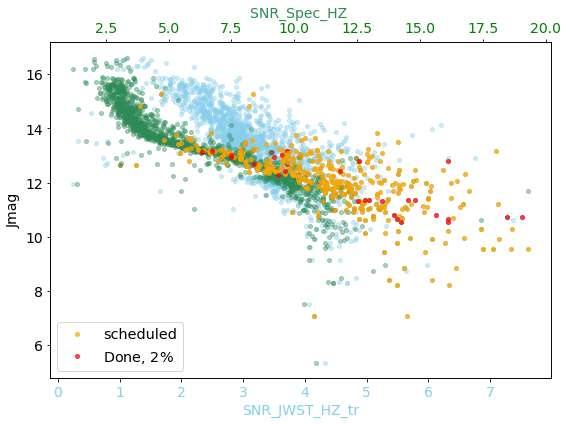

In [95]:
#target_name = ['Sp1444+3002','Sp1153+0659']
#target_idx = [np.where((df['Sp_ID'] == target_name[i]))[0][0] for i in range(len(target_name))]
#print(target_idx)

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(df['SNR_JWST_HZ_tr'][observed_on_going],df['J'][observed_on_going],\
         '.',markersize=8,markerfacecolor="orange",markeredgewidth=1,alpha=0.7,color='orange',label='scheduled',zorder=2)#
ax1.plot(df['SNR_JWST_HZ_tr'][observed_done],df['J'][observed_done],\
         '.',markersize=8,markerfacecolor="red",markeredgewidth=1,alpha=0.7,color='red',label=r'Done, $2\%$',zorder=3)
ax1.plot(df['SNR_JWST_HZ_tr'],df['J'],'.',markersize=8,color='skyblue',alpha=0.4,zorder=1)

#ax1.plot(df['SNR_JWST_HZ_tr'][target_idx],df['J'][target_idx],'8',markersize=6,color='blue',alpha=0.9,zorder=6,label="target in SNRjwst")
#ax1.plot(df['SNR_JWST_HZ_tr'][to_be_done],df['J'][to_be_done],'.',markersize=8,color='brown',alpha=0.6,label='prog 1 (JWST)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program1],df['J'][program1],'.',markersize=8,color='gold',alpha=0.9,label='prog 1 (JWST)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program2],df['J'][program2],'.',markersize=8,color='blue',alpha=0.6,label='prog 2 (TESS)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program3],df['J'][program3],'.',markersize=8,color='brown',alpha=0.6,label='prog 3 (UCD)')

ax1.set_xlabel('SNR_JWST_HZ_tr',fontsize=14,color='skyblue')
ax1.set_ylabel('Jmag',fontsize=14)
ax1.tick_params(axis="y", labelsize=14, labelcolor="k")
ax1.tick_params(axis='x', labelsize=14,labelcolor='skyblue')
ax1.legend(fontsize='x-large',loc=3)
ax2 = ax1.twiny()
ax2.plot(df['SNR_Spec_HZ'],df['J'],'.',markersize=8,color='seagreen',alpha=0.4,zorder=1)
ax2.plot(df['SNR_Spec_HZ'][observed_on_going],df['J'][observed_on_going],'.',\
         markersize=8,color='orange',markerfacecolor="orange",markeredgewidth=1,alpha=0.7,zorder=3)
ax2.plot(df['SNR_Spec_HZ'][observed_done],df['J'][observed_done],'.',markersize=8,color='red',markerfacecolor="red",markeredgewidth=1,alpha=0.7,zorder=3)

#ax2.plot(df['SNR_Spec_HZ'][target_idx],df['J'][target_idx],'8',markersize=6,color='springgreen',alpha=0.9,zorder=4,label="target in SNRt1b")
#ax2.plot(df['SNR_T1b'][program2],df['J'][program2],'8',markersize=6,color='pink',alpha=0.9,zorder=4,label="program2")

ax2.set_xlabel('SNR_Spec_HZ ',fontsize=14,color="seagreen")
ax2.set_ylabel('Jmag',fontsize=14)
ax2.tick_params(axis="x", labelsize=14, labelcolor="seagreen")
#ax2.set_xlim([1,21])


#plt.plot(df['SNR_JWST_HZ_tr'][trappist],df['J'][trappist],'.',markersize=8,color='purple',alpha=0.6,label='TRAPPIST')
#plt.plot(df['SNR_JWST_HZ_tr'][sso],df['J'][sso],'.',markersize=8,color='skyblue',alpha=0.6,label='SSO')
#plt.plot(df['SNR_JWST_HZ_tr'][artemis],df['J'][artemis],'.',markersize=8,color='green',alpha=0.4,label='SNO')
#plt.plot(df['SNR_JWST_HZ_tr'][saint_ex],df['J'][saint_ex],'.',markersize=8,color='gold',alpha=0.4,label='Saint-Ex')
ax2.tick_params(axis='x', labelcolor='green')
#ax2.legend(fontsize='x-large',loc=1)
fig.tight_layout()
plt.savefig('Jmag_vs_SNRs.pdf')
plt.show()

[1004, 799]


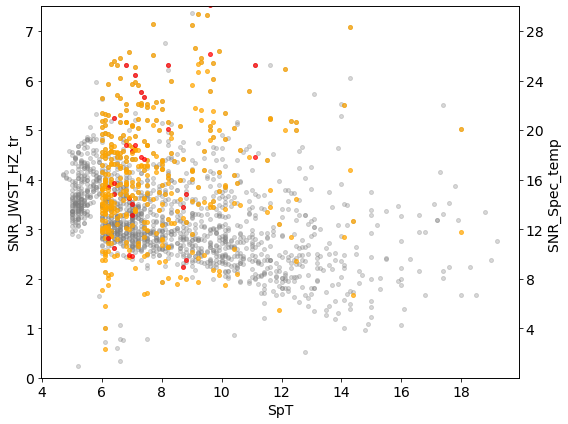

In [97]:
target_name = ['Sp1444+3002','Sp1153+0659']
target_idx = [np.where((df['Sp_ID'] == target_name[i]))[0][0] for i in range(len(target_name))]
print(target_idx)

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(df['SpT'][observed_on_going],df['SNR_JWST_HZ_tr'][observed_on_going],'.',markersize=8,markerfacecolor="orange",markeredgewidth=1,alpha=0.7,color='orange',label=r'On going, $12\%$',zorder=2)
ax1.plot(df['SpT'][observed_done],df['SNR_JWST_HZ_tr'][observed_done],'.',markersize=8,markerfacecolor="red",markeredgewidth=1,alpha=0.7,color='red',label=r'Done, $1\%$',zorder=3)
ax1.plot(df['SpT'],df['SNR_JWST_HZ_tr'],'.',markersize=8,color='gray',alpha=0.3,zorder=1)

#ax1.plot(df['SNR_JWST_HZ_tr'][target_idx],df['SpT'][target_idx],'8',markersize=6,color='blue',alpha=0.9,zorder=6,label="target in SNRjwst")
#ax1.plot(df['SNR_JWST_HZ_tr'][to_be_done],df['SpT'][to_be_done],'.',markersize=8,color='brown',alpha=0.6,label='prog 1 (JWST)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program1],df['SpT'][program1],'.',markersize=8,color='gold',alpha=0.9,label='prog 1 (JWST)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program2],df['SpT'][program2],'.',markersize=8,color='blue',alpha=0.6,label='prog 2 (TESS)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program3],df['SpT'][program3],'.',markersize=8,color='brown',alpha=0.6,label='prog 3 (UCD)')

ax1.set_xlabel('SpT',fontsize=14)
ax1.set_ylabel('SNR_JWST_HZ_tr',fontsize=14,color='k')
ax1.tick_params(axis="x", labelsize=14, labelcolor="k")
ax1.tick_params(axis='y', labelsize=14,labelcolor='k')

ax1.set_ylim([0,7.5])
#ax1.set_xlim([5,20])

#ax1.legend(fontsize='x-large',loc=3)
ax2 = ax1.twinx()

loc = [4,8,12,16,20,24,28,31]
ax2.set_yticks(loc)
ax2.set_yticklabels(loc)

ax2.set_ylim([0,30])
#ax2.plot(df['SpT'],df['SNR_Spec_temp'],'.',markersize=8,color='seagreen',alpha=0.4,zorder=1)
ax2.plot(df['SpT'][observed_on_going],df['SNR_Spec_temp'][observed_on_going],'.',markersize=8,color='orange',markerfacecolor="orange",markeredgewidth=1,alpha=0.7,zorder=3)
ax2.plot(df['SpT'][observed_done],df['SNR_Spec_temp'][observed_done],'.',markersize=8,color='red',markerfacecolor="red",markeredgewidth=1,alpha=0.7,zorder=3)

#ax2.plot(df['SNR_Spec_HZ'][target_idx],df['SpT'][target_idx],'8',markersize=6,color='springgreen',alpha=0.9,zorder=4,label="target in SNRt1b")
#ax2.plot(df['SNR_T1b'][program2],df['SpT'][program2],'8',markersize=6,color='pink',alpha=0.9,zorder=4,label="program2")

ax2.set_ylabel('SNR_Spec_temp ',fontsize=14,color="k")
#ax2.set_xlabel('SpT',fontsize=14)
ax2.tick_params(axis="y", labelsize=14, labelcolor="k")


#plt.plot(df['SNR_JWST_HZ_tr'][trappist],df['SpT'][trappist],'.',markersize=8,color='purple',alpha=0.6,label='TRAPPIST')
#plt.plot(df['SNR_JWST_HZ_tr'][sso],df['SpT'][sso],'.',markersize=8,color='skyblue',alpha=0.6,label='SSO')
#plt.plot(df['SNR_JWST_HZ_tr'][artemis],df['SpT'][artemis],'.',markersize=8,color='green',alpha=0.4,label='SNO')
#plt.plot(df['SNR_JWST_HZ_tr'][saint_ex],df['SpT'][saint_ex],'.',markersize=8,color='gold',alpha=0.4,label='Saint-Ex')
#ax2.legend(fontsize='x-large',loc=1)

fig.tight_layout()
plt.savefig('Jmag_vs_SNRs.pdf')
plt.show()

In [48]:
max(df['SNR_JWST_HZ_tr']),max(df['SNR_Spec_temp'])

(7.62, 27.32)

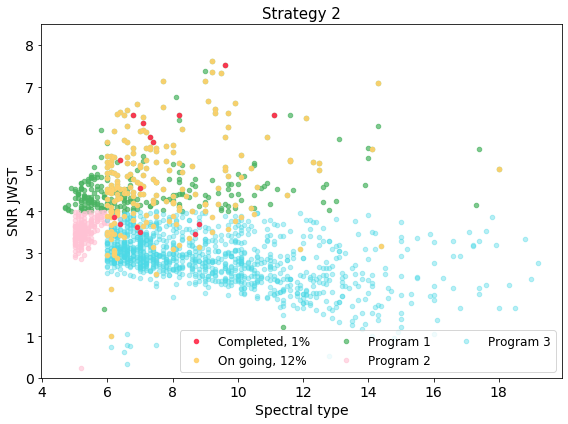

In [19]:


fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(df['SpT'][observed_done_prog1[0]],df['SNR_JWST_HZ_tr'][observed_done_prog1[0]],'.',markersize=8,markerfacecolor="#FF304D",markeredgewidth=1.5,alpha=0.9,markeredgecolor='#FF304D',zorder=4)
ax1.plot(df['SpT'][observed_done_prog2[0]],df['SNR_JWST_HZ_tr'][observed_done_prog2[0]],'.',markersize=8,markerfacecolor="#FF304D",markeredgewidth=1.5,alpha=0.9,markeredgecolor='#FF304D',zorder=4)
ax1.plot(df['SpT'][observed_done_prog3[0]],df['SNR_JWST_HZ_tr'][observed_done_prog3[0]],'.',markersize=8,markerfacecolor="#FF304D",markeredgewidth=1.5,alpha=0.9,markeredgecolor='#FF304D',zorder=4,label='Completed, 1%')

ax1.plot(df['SpT'][observed_on_going_prog1[0]],df['SNR_JWST_HZ_tr'][observed_on_going_prog1[0]],'.',markersize=8,markerfacecolor="#FFD16C",markeredgewidth=1.5,markeredgecolor='#FFD16C',alpha=0.9,zorder=2)
ax1.plot(df['SpT'][observed_on_going_prog2[0]],df['SNR_JWST_HZ_tr'][observed_on_going_prog2[0]],'.',markersize=8,markerfacecolor="#FFD16C",markeredgewidth=1.5,markeredgecolor='#FFD16C',alpha=0.9,zorder=2)
ax1.plot(df['SpT'][observed_on_going_prog3[0]],df['SNR_JWST_HZ_tr'][observed_on_going_prog3[0]],'.',markersize=8,markerfacecolor="#FFD16C",markeredgewidth=1.5,markeredgecolor='#FFD16C',alpha=0.9,zorder=2,label='On going, 12%')

#ax1.plot(df['SpT'][observed_done],df['SNR_JWST_HZ_tr'][observed_done],'.',markersize=8,markerfacecolor="red",markeredgewidth=1,alpha=0.7,color='red',label=r'Done, $2\%$',zorder=3)
ax1.plot(df['SpT'][program1[0]],df['SNR_JWST_HZ_tr'][program1[0]],'.',markersize=9,color='#4AB361',alpha=0.7,zorder=1,label="Program 1")
ax1.plot(df['SpT'][program2[0]],df['SNR_JWST_HZ_tr'][program2[0]],'.',markersize=9,color='#FFC2D4',alpha=0.6,zorder=1,label="Program 2")
ax1.plot(df['SpT'][program3[0]],df['SNR_JWST_HZ_tr'][program3[0]],'.',markersize=9,color='#4CD9E6',alpha=0.4,zorder=1,label="Program 3")

ax1.set_xlabel('Spectral type',fontsize=14,color='k')
ax1.set_ylabel('SNR JWST',fontsize=14)
ax1.tick_params(axis="y", labelsize=14, labelcolor="k")
ax1.tick_params(axis='x', labelsize=14,labelcolor='k')
ax1.legend(fontsize='large',loc=4,ncol=3)
#ax2 = ax1.twiny()
ax1.set_ylim([0,8.5])

plt.title('Strategy 2',fontsize=15)
fig.tight_layout()
plt.savefig('SpT_vs_SNR_prog_2020.pdf',bbox_inches='tight')
plt.show()

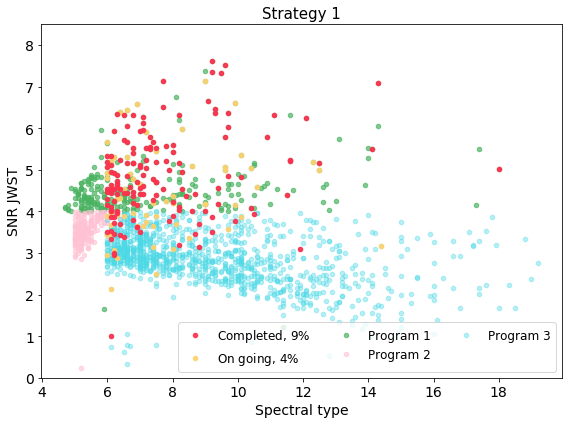

In [12]:


fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(df['SpT'][observed_done_strategy1[0]],df['SNR_JWST_HZ_tr'][observed_done_strategy1[0]],'.',markersize=8,markerfacecolor="#FF304D",markeredgewidth=1.5,alpha=0.9,markeredgecolor='#FF304D',zorder=4,label=r'Completed, $9\%$')

ax1.plot(df['SpT'][observed_on_going_strategy1[0]],df['SNR_JWST_HZ_tr'][observed_on_going_strategy1[0]],'.',markersize=8,markerfacecolor="#FFD16C",markeredgewidth=1.5,markeredgecolor='#FFD16C',alpha=0.9,zorder=2,label=r'On going, $4\%$')

ax1.plot(df['SpT'][program1[0]],df['SNR_JWST_HZ_tr'][program1[0]],'.',markersize=9,color='#4AB361',alpha=0.7,zorder=1,label="Program 1")
ax1.plot(df['SpT'][program2[0]],df['SNR_JWST_HZ_tr'][program2[0]],'.',markersize=9,color='#FFC2D4',alpha=0.6,zorder=1,label="Program 2")
ax1.plot(df['SpT'][program3[0]],df['SNR_JWST_HZ_tr'][program3[0]],'.',markersize=9,color='#4CD9E6',alpha=0.4,zorder=1,label="Program 3")

ax1.set_xlabel('Spectral type',fontsize=14,color='k')
ax1.set_ylabel('SNR JWST',fontsize=14)
ax1.tick_params(axis="y", labelsize=14, labelcolor="k")
ax1.tick_params(axis='x', labelsize=14,labelcolor='k')
ax1.legend(fontsize='large',loc=4,ncol=3)
#ax2 = ax1.twiny()
ax1.set_ylim([0,8.5])
plt.title('Strategy 1',fontsize=15)
fig.tight_layout()
plt.savefig('SpT_vs_SNR_prog_1819.pdf',bbox_inches='tight')
plt.show()

In [7]:
df['SpT'][observed_on_going_prog1[0]]

5        9.4
30       8.3
36       6.9
38       6.5
50      12.1
77       7.2
87      10.1
88       9.1
90       8.2
135      6.8
146      7.3
155      7.7
177      6.1
181      7.0
188      6.6
189      6.9
192      8.2
193     18.0
203      8.0
211     10.1
217      7.3
255      6.1
273     12.3
288      7.4
290      7.7
296      6.8
331      6.3
348      6.4
355      6.0
357      7.2
362      7.8
365     11.6
381      6.1
382      6.3
383      7.1
391      7.5
404      9.9
416      6.1
451      8.0
457     14.1
459      9.6
482      7.5
497      6.0
514      6.2
516      6.7
523     10.4
526      6.0
537      7.9
574      6.3
576      6.8
584      6.3
586     14.3
589      6.0
606      9.0
614      6.2
618      7.0
638     11.5
642      8.0
652      6.0
656      7.5
665      6.2
671      8.3
683      7.1
687      6.3
693     12.5
694      6.2
726      7.4
732     10.4
733      6.6
735      9.2
745      6.0
760      7.2
763      8.0
771      6.1
786      8.4
799      6.1
802      7.0

# Plots Meeting

In [2]:
# ---------------------- LONG TERM SCHEDULER ---------------------
import matplotlib.pyplot as plt
from astropy.time import Time
from astroplan.plots import plot_sky
from astroplan import FixedTarget, Observer
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord,EarthLocation,CartesianRepresentation
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
obs = 2
schedule = SPOCKLT.Schedules()
schedule.load_parameters('./input.csv',obs)
df = schedule.target_table_spc
df[312]

INFO: Updating the number of hours observed


Sp_ID,2MASS_ID,Filter,texp_spc,nb_hours_threshold,nb_hours_surved,Gaia_ID,Program,RA,DEC,pm_RA,pm_DEC,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,telescope,SNR_JWST_temp_occ
str11,str16,str3,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str40,float64
Sp0530+1503,05302948+1503368,I+z,0,100.0,0.0,3390022703255507328,3,82.6229,15.0602,165.174,-178.515,17.3008,15.3462,13.066,12.486,12.031,27.8864,0.1668,0.0914,0.0028,0.1167,0.0132,2622.9395,104.7526,7.42,1.0683,2.4188,9.016,1.7103,6.6396,3.4318,0.9799,[],3.0054


In [3]:
df_exp = pd.read_csv('exposure_time_table.csv',delimiter=',')
idx_prog1 = np.where(((df['Program'] == 1) )) #& (df['Program'] == 3)))
idx_faintess = np.where((max(df['SpT'][idx_prog1])))
df[idx_prog1[0]][76]

Sp_ID,2MASS_ID,Filter,texp_spc,nb_hours_threshold,nb_hours_surved,Gaia_ID,Program,RA,DEC,pm_RA,pm_DEC,G,I,J,H,K,Dis,e_Dis,M,e_M,R,e_R,T_eff,e_Teff,SpT,e_Spt,SNR_TESS_temp,SNR_Spec_temp,SNR_TESS_HZ,SNR_Spec_HZ,SNR_JWST_HZ_tr,SNR_JWST_HZ_occ,telescope,SNR_JWST_temp_occ
str11,str16,str3,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str40,float64
Sp1753-2312,17531132-2312268,I+z,0,0.0,0.0,4068644101753728512,1,268.2997,-23.207,-199.354,130.68200000000002,19.6311,17.6787,13.956,12.476,12.031,9.2615,0.0866,0.0637,0.0198,0.0744,0.0361,1662.5057,349.6728,14.27,3.5466,1.6884,11.7222,1.1939,8.2888,6.0626,4.7337,[],14.238


In [4]:
coords = SkyCoord(frame='icrs', ra=df['RA'], dec=df['DEC'],unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coord_cartesian = coords.represent_as(CartesianRepresentation) 
observed_on_going = np.where((df['nb_hours_surved'] != 0) & (df['nb_hours_surved'] <= 100))
observed_done = np.where((df['nb_hours_surved'] > 100))
to_be_done = np.where((df['nb_hours_surved'] ==0))
coords = SkyCoord(frame='icrs', ra=118, dec=-24,unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coord_cartesian = coords.represent_as(CartesianRepresentation)
coord_cartesian.x.value, coord_cartesian.y.value, coord_cartesian.z.value

(-0.42888361367542377, 0.8066127627927412, -0.4067366430758002)

In [5]:
halfpi, pi, twopi = [f*np.pi for f in [0.5, 1, 2]]

degs, rads = 180/pi, pi/180

# do radians first, then convert later

nstars = 2000

ran1, ran2 = np.random.random(2*nstars).reshape(2, -1)

RA  = twopi * (ran1 - 0.5)
dec = np.arcsin(2.*(ran2-0.5)) # Hey Barry Carter!

funcs = [np.cos, np.sin]

cosRA,  sinRA  = [f(RA)  for f in funcs]
cosdec, sindec = [f(dec) for f in funcs]

x = cosRA * cosdec
y = sinRA * cosdec
z = sindec

decs = (np.arange(11)-5) * halfpi / 6.
RAs  = (np.arange(12)-5) * halfpi / 6.

theta = np.linspace(0, twopi, 101)

costh, sinth = [f(theta) for f in funcs]
zerth = np.zeros_like(theta)

fig = plt.figure(figsize= [8, 8])

ax  = fig.add_subplot(1, 1, 1, projection='3d')

#ax.plot(x, y, z, '.k')

#for i in range(len(df)):
#plt.plot(coord_cartesian.x, coord_cartesian.y, coord_cartesian.z,'.', color='gainsboro',alpha=0.9, markersize=6,zorder=2,label='To be done')
#plt.plot(coord_cartesian[observed_on_going].x, coord_cartesian[observed_on_going].y, coord_cartesian[observed_on_going].z,'.', color='orange',alpha=0.9, markersize=6,zorder=3,label='On going')
#plt.plot(coord_cartesian[observed_done].x, coord_cartesian[observed_done].y, coord_cartesian[observed_done].z,'.', color='red',alpha=0.9, markersize=6,zorder=4,label='Done')
coords = SkyCoord(frame='icrs', ra=[df['RA'][418],df['RA'][418]+2], dec=[df['DEC'][418],df['DEC'][418]+2],unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coord_cartesian = coords.represent_as(CartesianRepresentation)
plt.plot(coord_cartesian.x, coord_cartesian.y, coord_cartesian.z,'.', color='pink',alpha=0.9, markersize=6,zorder=2,label='To be done')

    
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_zlim(-1.1, 1.1)

ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('z',fontsize=14)
ax.tick_params(axis="x", labelsize=12, labelcolor="k")
ax.tick_params(axis="y", labelsize=12, labelcolor="k")
ax.tick_params(axis="z", labelsize=12, labelcolor="k")
ax.view_init(elev=20, azim=47)

decs = (np.arange(11)-5) * halfpi / 6.
RAs  = (np.arange(12)-5) * halfpi / 6.
# lines of declination
xvals = costh * np.cos(decs)[:, None]
yvals = sinth * np.cos(decs)[:, None]
zvals = zerth + np.sin(decs)[:, None]
for x, y, z in zip(xvals, yvals, zvals):
    plt.plot(x, y, z, 'k',alpha=0.5, linewidth=0.8,zorder=1)

# lines of Right Ascention
xvals = costh * np.cos(RAs)[:, None]
yvals = costh * np.sin(RAs)[:, None]
zvals = sinth + np.zeros_like(RAs)[:, None]
for x, y, z in zip(xvals, yvals, zvals):
    plt.plot(x, y, z, 'k',alpha=0.5, linewidth=0.8,zorder=1)
plt.legend(fontsize='xx-large')

plt.savefig('./SPOCK_Figures/All_sky_cartesian_done_or not.pdf')

<IPython.core.display.Javascript object>

In [6]:
halfpi, pi, twopi = [f*np.pi for f in [0.5, 1, 2]]

degs, rads = 180/pi, pi/180

# do radians first, then convert later

nstars = 2000

ran1, ran2 = np.random.random(2*nstars).reshape(2, -1)

RA  = twopi * (ran1 - 0.5)
dec = np.arcsin(2.*(ran2-0.5)) # Hey Barry Carter!

funcs = [np.cos, np.sin]

cosRA,  sinRA  = [f(RA)  for f in funcs]
cosdec, sindec = [f(dec) for f in funcs]

x = cosRA * cosdec
y = sinRA * cosdec
z = sindec

decs = (np.arange(11)-5) * halfpi / 6.
RAs  = (np.arange(12)-5) * halfpi / 6.

theta = np.linspace(0, twopi, 101)

costh, sinth = [f(theta) for f in funcs]
zerth = np.zeros_like(theta)


fig = plt.figure(figsize= [14, 14])

ax  = fig.add_subplot(1, 1, 1, projection='3d')

io = []
europa = []
ganymede = []
callisto = []
artemis = []
saint_ex = []
trappist = []
for i in range(len(df)):
    if 'Io' in df['telescope'][i]:
        io.append(i)
    if 'Europa' in df['telescope'][i]:
        europa.append(i)
    if 'Ganymede' in df['telescope'][i]:
        ganymede.append(i)
    if 'Callisto' in df['telescope'][i]:
        callisto.append(i)
    if 'Artemis' in df['telescope'][i]:
        artemis.append(i)
    if 'Saint-Ex' in df['telescope'][i]:
        saint_ex.append(i)
    if 'TRAPPIST' in df['telescope'][i]:
        trappist.append(i)

#for i in range(len(df)):
plt.plot(coord_cartesian.x, coord_cartesian.y, coord_cartesian.z,'.', color='gainsboro',alpha=0.5,markersize=8, linewidth=0.8,zorder=2,label='Remaining')
plt.plot(coord_cartesian[trappist].x, coord_cartesian[trappist].y, coord_cartesian[trappist].z,'.', color='purple',alpha=0.5, markersize=8,zorder=3,label='TRAPPIST')

plt.plot(coord_cartesian[io].x, coord_cartesian[io].y, coord_cartesian[io].z,'.', color='red',alpha=0.5, markersize=8,zorder=3,label='Io')
plt.plot(coord_cartesian[europa].x, coord_cartesian[europa].y, coord_cartesian[europa].z,'.', color='blue',alpha=0.5, markersize=8,zorder=4,label='Europa')
plt.plot(coord_cartesian[ganymede].x, coord_cartesian[ganymede].y, coord_cartesian[ganymede].z,'.', color='orange',alpha=0.5, markersize=8,zorder=4,label='Ganymede')
plt.plot(coord_cartesian[callisto].x, coord_cartesian[callisto].y, coord_cartesian[callisto].z,'.', color='turquoise',alpha=0.5, markersize=8,zorder=4,label='Callisto')

plt.plot(coord_cartesian[artemis].x, coord_cartesian[artemis].y, coord_cartesian[artemis].z,'.', color='green',alpha=0.5, markersize=8,zorder=4,label='Artemis')
plt.plot(coord_cartesian[saint_ex].x, coord_cartesian[saint_ex].y, coord_cartesian[saint_ex].z,'.', color='gold',alpha=0.5, markersize=8,zorder=4,label='Saint-Ex')


ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
ax.set_zlim(-1.1,1.1)


decs = (np.arange(11)-5) * halfpi / 6.
RAs  = (np.arange(12)-5) * halfpi / 6.
# lines of declination
xvals = costh * np.cos(decs)[:, None]
yvals = sinth * np.cos(decs)[:, None]
zvals = zerth + np.sin(decs)[:, None]
for x, y, z in zip(xvals, yvals, zvals):
    plt.plot(x, y, z, 'k',alpha=0.5, linewidth=0.8,zorder=1)

# lines of Right Ascention
xvals = costh * np.cos(RAs)[:, None]
yvals = costh * np.sin(RAs)[:, None]
zvals = sinth + np.zeros_like(RAs)[:, None]
for x, y, z in zip(xvals, yvals, zvals):
    plt.plot(x, y, z, 'k',alpha=0.7, linewidth=0.8,zorder=1)

ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('z',fontsize=14)
ax.tick_params(axis="x", labelsize=12, labelcolor="dimgrey")
ax.tick_params(axis="y", labelsize=12, labelcolor="dimgrey")
ax.tick_params(axis="z", labelsize=12, labelcolor="dimgrey")
ax.view_init(elev=1, azim=47)
plt.legend(fontsize='xx-large')
plt.savefig('./SPOCK_Figures/All_sky_cartesian_which_telescope.pdf')

import plotly.tools as tls

import matplotlib.animation as animation
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
#ani = animation.FuncAnimation(fig, fig_GIF,frames=2000, interval=20, blit=True)



<IPython.core.display.Javascript object>

IndexError: index 138 is out of bounds for axis 0 with size 2

In [ ]:
import matplotlib.pyplot as plt
from astropy.time import Time
from astroplan.plots import plot_sky
from astroplan import FixedTarget, Observer

location = EarthLocation.from_geodetic(-70.40300000000002*u.deg, -24.625199999999996*u.deg,2635.0000000009704*u.m)
observatory = Observer(location=location, name="SSO", timezone="UTC")
observed_on_going = np.where((df['nb_hours_surved'] != 0) & (df['nb_hours_surved'] <= 100))
observed_done = np.where((df['nb_hours_surved'] > 100))
#to_be_done = np.where((df['nb_hours_surved'] == 0))
targets_on_going = [FixedTarget(coord=coords[i],name=df['Sp_ID'][observed_on_going][i]) for i in range(len(df[observed_on_going]))]
targets_done = [FixedTarget(coord=coords[i],name=df['Sp_ID'][observed_done][i]) for i in range(len(df[observed_done]))]

observe_time = Time(['2020-01-16T00:00:00'])
not_done = {'color': 'gainsboro'}
done = {'color': 'red'}
on_going = {'color': 'orange'}

plt.figure()
plot_sky(targets, observatory, observe_time,style_kwargs=not_done)
plot_sky(targets_done, observatory, observe_time,style_kwargs=done)
#plot_sky(targets_on_going, observatory, observe_time,style_kwargs=on_going)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

In [ ]:
df['RA'][418]

In [ ]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord,EarthLocation,CartesianRepresentation
plt.figure(figsize=(8,6))
plt.subplot(111, projection="aitoff")
ax = plt.gca()
#plt.title("Aitoff projection of our random data")
observed_on_going = np.where(((df['nb_hours_surved'] != 0) & (df['nb_hours_surved'] <= 100)))
observed_done = np.where((df['nb_hours_surved'] > 100))
to_be_done = np.where((df['nb_hours_surved'] == 0))

plt.plot(df['RA'][observed_on_going], df['DEC'][observed_on_going], 'o', markersize=5, alpha=0.8,color='orange',zorder=2,label='On going (#' + str(len(df['RA'][observed_on_going])) + ')' )
plt.plot(df['RA'][to_be_done], df['DEC'][to_be_done], 'o', markersize=5, alpha=0.3,color='gray',zorder=1,label='To be done (#' + str(len(df['RA'][to_be_done])) + ')')
plt.subplots_adjust(top=0.95,bottom=0.0)
ax.tick_params(axis="x", labelsize=12, labelcolor="k")
ax.tick_params(axis="y", labelsize=12, labelcolor="k")
#plt.legend(fontsize='xx-large',loc=4)
plt.grid(True)

plt.savefig('./SPOCK_Figures/All_sky_nb_hours_archived.pdf')
plt.show()

In [ ]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
plt.figure(figsize=(10,8))
plt.subplot(111, projection="aitoff")
ax = plt.gca()
#plt.title("Aitoff projection of our random data")
plt.grid(True)
io = []
europa = []
ganymede = []
callisto = []
artemis = []
saint_ex = []
trappist = []
for i in range(len(df)):
    if 'Io' in df['telescope'][i]:
        io.append(i)
    if 'Europa' in df['telescope'][i]:
        europa.append(i)
    if 'Ganymede' in df['telescope'][i]:
        ganymede.append(i)
    if 'Callisto' in df['telescope'][i]:
        callisto.append(i)
    if 'Artemis' in df['telescope'][i]:
        artemis.append(i)
    if 'Saint-Ex' in df['telescope'][i]:
        saint_ex.append(i)
    if 'TRAPPIST' in df['telescope'][i]:
        trappist.append(i)
#plt.plot(coords[io].ra, coords[io].dec, 'o', markersize=5, alpha=0.8,color='red',zorder=2,label='Io')
plt.plot(df['RA'][europa], df['DEC'][europa], 'o', markersize=5, alpha=0.8,color='blue',zorder=2,label='Europa' )
plt.plot(df['RA'][ganymede], df['DEC'][ganymede], 'o', markersize=5, alpha=0.8,color='orange',zorder=2,label='Ganymede')
plt.plot(df['RA'][callisto], df['DEC'][callisto], 'o', markersize=5, alpha=0.8,color='turquoise',zorder=2,label='Callisto')
plt.plot(df['RA'][artemis], df['DEC'][artemis], 'o', markersize=5, alpha=0.8,color='green',zorder=2,label='Artemis')
plt.plot(df['RA'][trappist], df['DEC'][trappist], 'o', markersize=5, alpha=0.8,color='purple',zorder=2,label='TRAPPIST')

plt.subplots_adjust(top=0.95,bottom=0.0)
ax.tick_params(axis="x", labelsize=14, labelcolor="k")
ax.tick_params(axis="y", labelsize=14, labelcolor="k")
plt.legend(fontsize='xx-large',loc=4)
plt.savefig('./SPOCK_Figures/All_sky_telescope.pdf')
plt.show()

In [ ]:
# ---------------------- LONG TERM SCHEDULER ---------------------
from astropy.table import Table
df_read = pd.read_csv('speculoos_target_list_webupdate.txt', delimiter=' ')
df = Table.from_pandas(df_read)

c = [SkyCoord(str(df['RA1'][i]) + ' ' +  str(df['RA2'][i]) + ' ' + str(round(df['RA3'][i])) + ' ' + str(df['DEC1'][i]) + ' ' + str(df['DEC2'][i]) + ' ' + str(round(df['DEC3'][i])), unit=(u.hourangle, u.deg)) for i in range(len(df))]

c

In [ ]:
c[list(observed_done[0])]

In [ ]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
plt.figure(figsize=(14,12))
plt.subplot(111, projection="aitoff")
ax = plt.gca()
#plt.title("Aitoff projection of our random data")
plt.grid(True)
observed_on_going = np.where(((df['nb_hours_surved'] != 0) & (df['nb_hours_surved'] <= 100)))
observed_done = np.where((df['nb_hours_surved'] > 100))
to_be_done = np.where((df['nb_hours_surved'] == 0))
plt.plot(c[observed_done].ra, c[observed_done].dec, 'o', markersize=5, alpha=0.8,color='red',zorder=2,label='Done (#' + str(len(df['RA'][observed_done])) + ')' )
plt.plot(c[observed_on_going].ra, c[observed_on_going].dec, 'o', markersize=5, alpha=0.8,color='orange',zorder=2,label='On going (#' + str(len(df['RA'][observed_on_going])) + ')' )
plt.plot(c[to_be_done].ra, c[to_be_done].dec, 'o', markersize=5, alpha=0.3,color='gray',zorder=1,label='To be done (#' + str(len(df['RA'][to_be_done])) + ')')
plt.subplots_adjust(top=0.95,bottom=0.0)
ax.tick_params(axis="x", labelsize=14, labelcolor="k")
ax.tick_params(axis="y", labelsize=14, labelcolor="k")
plt.legend(fontsize='xx-large',loc=4)
plt.show()

In [ ]:
program1 = np.where((df['prog']==1))
program2 = np.where((df['prog']==2))
program3 = np.where((df['prog']==3))
sso = []
artemis = []
saint_ex = []
trappist = []
for i in range(len(df)):
    if 'Io' in df['telescope'][i]:
        sso.append(i)
    if 'Europa' in df['telescope'][i]:
        sso.append(i)
    if 'Ganymede' in df['telescope'][i]:
        sso.append(i)
    if 'Callisto' in df['telescope'][i]:
        sso.append(i)
    if 'Artemis' in df['telescope'][i]:
        artemis.append(i)
    if 'Saint-Ex' in df['telescope'][i]:
        saint_ex.append(i)
    if 'TRAPPIST' in df['telescope'][i]:
        trappist.append(i)

plt.figure(figsize=(8,6))
ax = plt.gca()
#plt.plot(df['SpT'][observed_on_going],df['J'][observed_on_going],'.',markersize=8,color='orange',label='on going',zorder=2)
#plt.plot(df['SpT'][observed_done],df['J'][observed_done],'.',markersize=8,color='red',label='done',zorder=2)
plt.plot(df['SpT'],df['J'],'.',markersize=8,color='gainsboro',alpha=0.4,zorder=1,label='Target list stars')
#plt.plot(df['SpT'][to_be_done],df['J'][to_be_done],'.',markersize=8,color='brown',alpha=0.6,label='prog 1 (JWST)')
#plt.plot(df['SpT'][program1],df['J'][program1],'.',markersize=8,color='gold',alpha=0.9,label='prog 1 (JWST)')
#plt.plot(df['SpT'][program2],df['J'][program2],'.',markersize=8,color='blue',alpha=0.6,label='prog 2 (TESS)')
#plt.plot(df['SpT'][program3],df['J'][program3],'.',markersize=8,color='brown',alpha=0.6,label='prog 3 (UCD)')

plt.plot(df['SpT'][trappist],df['J'][trappist],'.',markersize=8,color='purple',alpha=0.6,label='TRAPPIST')
plt.plot(df['SpT'][sso],df['J'][sso],'.',markersize=8,color='skyblue',alpha=0.6,label='SSO')
plt.plot(df['SpT'][artemis],df['J'][artemis],'.',markersize=8,color='green',alpha=0.4,label='SNO')
plt.plot(df['SpT'][saint_ex],df['J'][saint_ex],'.',markersize=8,color='gold',alpha=0.4,label='Saint-Ex')


plt.legend(fontsize='xx-large',loc=4)
ax.set_xlabel('Spectral type',fontsize=14)
ax.set_ylabel('J magnitude',fontsize=14)
ax.tick_params(axis="x", labelsize=14, labelcolor="k")
ax.tick_params(axis="y", labelsize=14, labelcolor="k")
plt.savefig('Spt_vs_Jmag_telescope.pdf')
plt.show()

[849, 670]


<IPython.core.display.Javascript object>


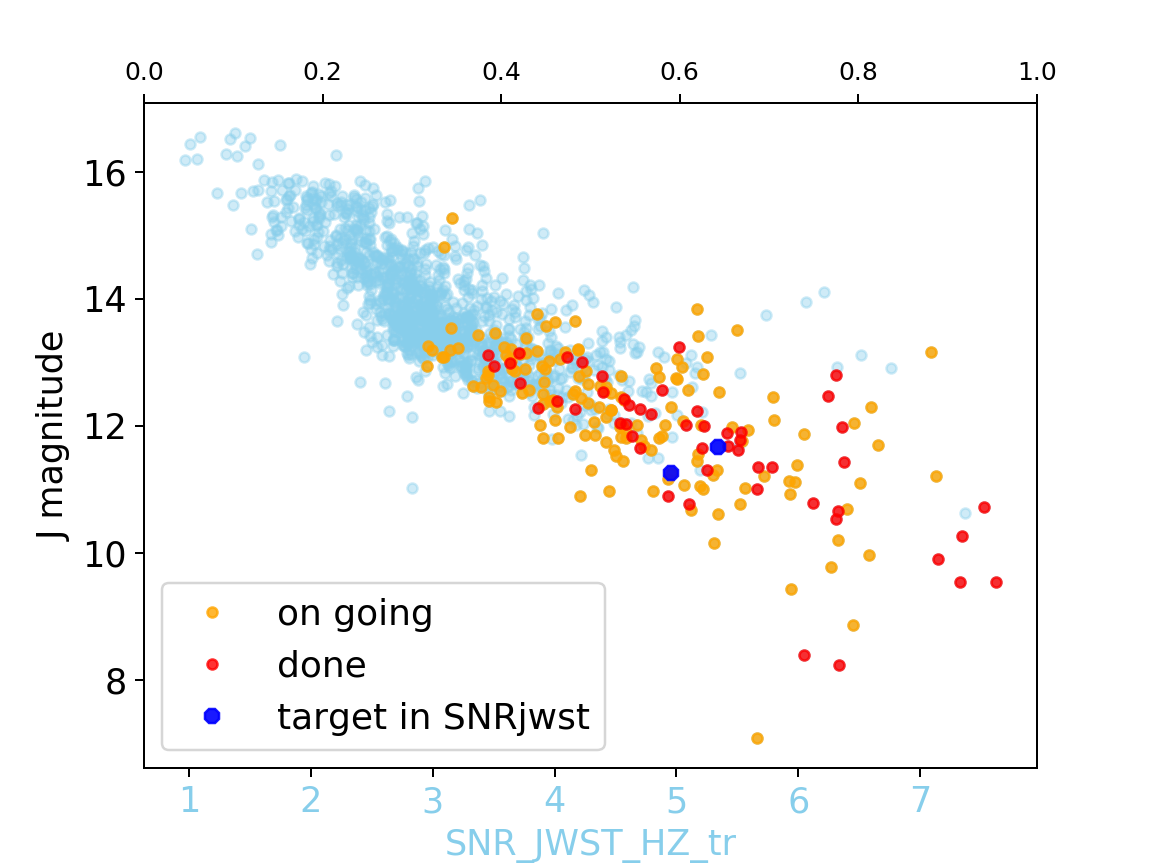

KeyError: 'SNR_T1b'

In [7]:
target_name = ['Sp1444+3002','Sp1153+0659']
target_idx = [np.where((df['Sp_ID'] == target_name[i]))[0][0] for i in range(len(target_name))]
print(target_idx)

fig, ax1 = plt.subplots()
ax1.plot(df['SNR_JWST_HZ_tr'][observed_on_going],df['J'][observed_on_going],'.',markersize=8,alpha=0.8,color='orange',label='on going',zorder=2)
ax1.plot(df['SNR_JWST_HZ_tr'][observed_done],df['J'][observed_done],'.',markersize=8,alpha=0.8,color='red',label='done',zorder=3)
ax1.plot(df['SNR_JWST_HZ_tr'],df['J'],'.',markersize=8,color='skyblue',alpha=0.4,zorder=1)
ax1.plot(df['SNR_JWST_HZ_tr'][target_idx],df['J'][target_idx],'8',markersize=6,color='blue',alpha=0.9,zorder=6,label="target in SNRjwst")
#ax1.plot(df['SNR_JWST_HZ_tr'][to_be_done],df['J'][to_be_done],'.',markersize=8,color='brown',alpha=0.6,label='prog 1 (JWST)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program1],df['J'][program1],'.',markersize=8,color='gold',alpha=0.9,label='prog 1 (JWST)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program2],df['J'][program2],'.',markersize=8,color='blue',alpha=0.6,label='prog 2 (TESS)')
#ax1.plot(df['SNR_JWST_HZ_tr'][program3],df['J'][program3],'.',markersize=8,color='brown',alpha=0.6,label='prog 3 (UCD)')

ax1.set_xlabel('SNR_JWST_HZ_tr',fontsize=14,color='skyblue')
ax1.set_ylabel('J magnitude',fontsize=14)
ax1.tick_params(axis="y", labelsize=14, labelcolor="k")
ax1.tick_params(axis='x', labelsize=14,labelcolor='skyblue')
ax1.legend(fontsize='x-large',loc=3)
ax2 = ax1.twiny()
ax2.plot(df['SNR_T1b'],df['J'],'.',markersize=8,color='seagreen',alpha=0.4,zorder=1)
ax2.plot(df['SNR_T1b'][observed_on_going],df['J'][observed_on_going],'.',markersize=8,color='orange',zorder=3)
ax2.plot(df['SNR_T1b'][observed_done],df['J'][observed_done],'.',markersize=8,color='red',zorder=3)
ax2.plot(df['SNR_T1b'][target_idx],df['J'][target_idx],'8',markersize=6,color='springgreen',alpha=0.9,zorder=4,label="target in SNRt1b")
#ax2.plot(df['SNR_T1b'][program2],df['J'][program2],'8',markersize=6,color='pink',alpha=0.9,zorder=4,label="program2")

ax2.set_xlabel('SNR_T1b ',fontsize=14,color="seagreen")
ax2.set_ylabel('J magnitude',fontsize=14)
ax2.tick_params(axis="x", labelsize=14, labelcolor="seagreen")
#ax2.set_xlim([0,20])


#plt.plot(df['SNR_JWST_HZ_tr'][trappist],df['J'][trappist],'.',markersize=8,color='purple',alpha=0.6,label='TRAPPIST')
#plt.plot(df['SNR_JWST_HZ_tr'][sso],df['J'][sso],'.',markersize=8,color='skyblue',alpha=0.6,label='SSO')
#plt.plot(df['SNR_JWST_HZ_tr'][artemis],df['J'][artemis],'.',markersize=8,color='green',alpha=0.4,label='SNO')
#plt.plot(df['SNR_JWST_HZ_tr'][saint_ex],df['J'][saint_ex],'.',markersize=8,color='gold',alpha=0.4,label='Saint-Ex')
ax2.tick_params(axis='x', labelcolor='green')
ax2.legend(fontsize='x-large',loc=1)
fig.tight_layout()
plt.savefig('Spt_vs_SNRs_Sp0823+6125.pdf')
plt.show()

In [ ]:
np.where((df['SNR_T1b'] == max(df['SNR_T1b'][observed_on_going]))),\
np.where((df['SNR_T1b'][observed_on_going] == max(df['SNR_T1b'][observed_on_going]))),observed_on_going[0][np.where((df['SNR_T1b'][observed_on_going] == max(df['SNR_T1b'][observed_on_going])))],\
df['Sp_ID'][observed_on_going[0][np.where((df['SNR_T1b'][observed_on_going] == max(df['SNR_T1b'][observed_on_going])))]]



In [ ]:
len(df['SNR_JWST_HZ_tr'][observed_on_going])/len(df['SNR_JWST_HZ_tr'])

In [ ]:

idx = np.where((df['SNR_JWST_HZ_tr'][observed_done] == max(df['SNR_JWST_HZ_tr'][observed_done])))
idx_in_df = observed_done[0][idx][0]
np.where((df['SNR_JWST_HZ_tr'] == max(df['SNR_JWST_HZ_tr'][observed_done]))),df['Sp_ID'][idx_in_df]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(df['prog'],df['J'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(df['prog'], df['J'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
faint = np.where((df['J'] > 12.8))
len(df['J'][faint]),len(df['J'])

In [ ]:
from docx import Document

document = Document()
document.save('test.docx')

In [10]:
from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Schedule from ', 0)

p = document.add_paragraph('Operator is charge is ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

document.add_heading('Heading, level 1', level=1)
document.add_paragraph('Intense quote', style='Intense Quote')

document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)
document.add_paragraph(
    'first item in ordered list', style='List Number'
)


document.save('demo.docx')

In [ ]:
from docx import Document
from docx.shared import *
from docx.enum.text import *

doc = Document()
par = doc.add_paragraph()
par_format = par.paragraph_format
par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
par_format.space_after = Pt(6)
run = par.add_run('       TRAPPIST-South          ')
run.bold = True
font = run.font
#font.name = 'Calibri'
font.size = Pt(16)
font.color.rgb = RGBColor(0x24, 0x24, 0x24)
par = doc.add_paragraph()
par_format = par.paragraph_format
par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
run = par.add_run('Schedule from 10 Jul 2017 to 12 Jul 2017 ')
run.bold = True
font = run.font
#font.name = 'Calibri'
font.size = Pt(16)
font.color.rgb = RGBColor(0x24, 0x24, 0x24)
par = doc.add_paragraph()
par_format = par.paragraph_format
par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
run = par.add_run('(Total time = 0hr, technical loss = 0hr, weather loss = 0hr, Exotime = 0hr, cometime = 0hr, chilean time = 0hr)')
run.bold = True
font = run.font
#font.name = 'Calibri'
font.size = Pt(12)
font.color.rgb = RGBColor(255, 0, 0)
par = doc.add_paragraph()
par_format = par.paragraph_format
par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
par_format.space_after = Pt(6)
run = par.add_run('[Michael]')
run.italic = True
font = run.font
#font.name = 'Calibri'
font.size = Pt(12)
font.color.rgb = RGBColor(0x24, 0x24, 0x24)
#doc.add_page_break()
#doc.add_picture('a.png',width=Inches(6.0))
doc.save('test.docx')


In [ ]:
from docx import Document
from docx.shared import *
from docx.enum.text import *
from astropy.table import Table

obs = 5
schedule = SPOCKLT.Schedules()
schedule.load_parameters('./input.csv',obs)
df = schedule.target_table_spc

date_range = schedule.date_range
observatory = schedule.observatory
telescope =schedule.telescope

def read_night_block(telescope,day):
    day_fmt = Time(day, scale='utc', out_subfmt='date').tt.datetime.strftime("%Y-%m-%d")
    scheduler_table = Table.read('./DATABASE/' + str(telescope) +'/night_blocks_'+ str(telescope) +'_' + str(day_fmt)+'.txt', format='ascii')
    return scheduler_table    

def make_docx_schedule(observatory,date_range,name_operator):
    
    nb_day_date_range  =  date_range_in_days(date_range)
    telescope =schedule.telescope
    doc = Document()
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
    par_format.space_before = Pt( 0)
    par_format.space_after = Pt( 6)
    run = par.add_run(observatory.name)
    run.bold = True
    font = run.font
    font.size = Pt(16)
    font.color.rgb = RGBColor(  0,  0,  0)
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
    par_format.space_before = Pt( 0)
    par_format.space_after = Pt(12)
    run = par.add_run('Schedule from ' + Time(date_range[0], out_subfmt='date').value + ' to ' + Time(date_range[1], out_subfmt='date').value)
    run.bold = True
    font = run.font
    font.size = Pt(16)
    font.color.rgb = RGBColor(  0,  0,  0)
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
    par_format.space_before = Pt( 0)
    par_format.space_after = Pt(12)
    run = par.add_run('(Total time = 0hr, technical loss = 0hr, weather loss = 0hr, Exotime = 0hr, cometime = 0hr,   chilean time = 0hr)')
    run.bold = True
    font = run.font
    font.size = Pt(12)
    font.color.rgb = RGBColor(255,  0,  0)
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
    par_format.space_before = Pt( 0)
    par_format.space_after = Pt(20)
    run = par.add_run(name_operator)
    run.italic = True
    font = run.font
    font.size = Pt(12)
    font.color.rgb = RGBColor(  0,  0,  0)
    par = doc.add_paragraph()
    par_format = par.paragraph_format
    par_format.space_before = Pt(16)
    par_format.space_after = Pt( 0)
        
    for i in range(0,8):
        
        date = date_range[0] + i
        read_night_block(telescope,date)
        
        table_schedule = read_night_block(telescope,date)
        idx_target = [np.where(( df['Sp_ID'] == table_schedule['target'][i])) for i in range(len(table_schedule))]

        sun_set = observatory.sun_set_time(date,which='next').iso 
        sun_rise = observatory.sun_rise_time(date,which='next').iso  
        moon_illumination = int(round(astroplan.moon_illumination(date)*100,0)) *u.percent
        civil_twilights = [Time(observatory.twilight_evening_civil(date ,which='next')).iso,Time(observatory.twilight_morning_civil(date +1 ,which='nearest')).iso]
        nautic_twilights = [Time(observatory.twilight_evening_nautical(date ,which='next')).iso,Time(observatory.twilight_morning_nautical(date +1 ,which='nearest')).iso]
        astro_twilights =[Time(observatory.twilight_evening_astronomical(date ,which='next')).iso,Time(observatory.twilight_morning_astronomical(date +1 ,which='nearest')).iso]
        start_night = table_schedule['start time (UTC)'][0]
        end_night = table_schedule['end time (UTC)'][-1]
        night_duration = round((Time(end_night) - Time(start_night)).jd * 24,3) * u.hour
        

        run = par.add_run('Night starting on the ' + Time(date, out_subfmt='date').value)
        run.bold = True
        run.underline = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 0)
        run = par.add_run('Moon illumination: ' + str(moon_illumination) )
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 0)
        run = par.add_run('Sunset /  Sunrise: ' + Time(sun_set, out_subfmt='date_hm').value + '  / '  + Time(sun_rise, out_subfmt='date_hm').value)
        run.italic = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 0)
        run = par.add_run('Civil/Naut./Astro. twilights: ' + Time(civil_twilights[0], out_subfmt='date_hm').value +  '/' + Time(civil_twilights[1], out_subfmt='date_hm').value +\
                          ' , ' + Time(nautic_twilights[0], out_subfmt='date_hm').value +  '/' + Time(nautic_twilights[1], out_subfmt='date_hm').value+\
                          ' , ' + Time(astro_twilights[0], out_subfmt='date_hm').value +  '/' + Time(astro_twilights[1], out_subfmt='date_hm').value)
        run.italic = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 0)
        run = par.add_run('Start-end of night (Naut. twil.): ' + start_night + ' to ' + end_night)
        run.italic = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt( 0)
        par_format.space_after = Pt( 3)
        run = par.add_run('Night duration (Naut. twil.): ' + str(night_duration))
        run.italic = True
        font = run.font
        font.size = Pt(12)
        font.color.rgb = RGBColor(  0,  0,  0)
        
        
        for i in range(len(table_schedule)):
            idx_target = np.where(( df['Sp_ID'] == table_schedule['target'][i]))
            start_time_target = table_schedule['start time (UTC)'][i]
            end_time_target = table_schedule['end time (UTC)'][i]
            config = table_schedule['configuration'][i]
            dist_moon =  '34'
            
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 0)
            run = par.add_run('From ' + Time(start_time_target, out_subfmt='date_hm').value  +  ' to ' + Time(end_time_target, out_subfmt='date_hm').value   + ' : ' + str(df['Sp_ID'][idx_target].data.data[0]))
            run.bold = True
            font = run.font
            font.size = Pt(12)
            font.color.rgb = RGBColor(  0,  0,  0)
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 0)
            run = par.add_run('  Note: Prio_target                                         ')
            font = run.font
            font.size = Pt(10)
            font.color.rgb = RGBColor(  0,  0,  0)
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 0)
            run = par.add_run('  SPECULOOS : '  + str(df['nb_hours_surved'][idx_target].data.data[0]) +  ' hours of obs over '  + str(df['nb_hours_threshold'][idx_target].data.data[0]) )
            font = run.font
            font.size = Pt(10)
            font.color.rgb = RGBColor(  0,  0,  0) 
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 0)
            run = par.add_run('Jmag= ' + str(df['J'][idx_target].data.data[0]) + ',  SpT= ' + str(df['SpT'][idx_target].data.data[0]) )#+ ', Moon at ' + str(dist_moon))
            font = run.font
            font.size = Pt(12)
            font.color.rgb = RGBColor(  0,  0,  0)
            par = doc.add_paragraph()
            par_format = par.paragraph_format
            par_format.space_before = Pt( 0)
            par_format.space_after = Pt( 3)
            run = par.add_run('  RA='  + str(round(df['RA'][idx_target].data.data[0],2) * u.degree) + ', DEC= ' + str(round(df['DEC'][idx_target].data.data[0],2)  * u.degree) + ', Config: ' + str(config) )
            font = run.font
            font.size = Pt(12)
            font.color.rgb = RGBColor(  0,  0,  0)
            
        par = doc.add_paragraph()
        par_format = par.paragraph_format
        par_format.space_before = Pt(16)
        par_format.space_after = Pt( 0)

    font = run.font
    font.size = Pt(12)
    font.color.rgb = RGBColor(  0,  0,  0)
    doc.save('schedule.docx')


def date_range_in_days(date_range):
    date_format = "%Y-%m-%d %H:%M:%S.%f"
    date_start = datetime.datetime.strptime(date_range[0].value, date_format)
    date_end = datetime.datetime.strptime(date_range[1].value, date_format)
    date_range_in_days = (date_end - date_start).days
    return date_range_in_days  
                              
                              
make_docx_schedule(observatory,date_range,'Khalid')

In [138]:
coords = SkyCoord(frame='icrs', ra='15h09m40.9477996s', dec='-10d52m10.185124505s',unit=(u.deg,u.deg), obstime='2020-01-16T00:00:00')
coords.ra.hms,coords.dec.dms,coords.ra.deg,coords.dec.deg

(hms_tuple(h=15.0, m=9.0, s=40.94779960000835),
 dms_tuple(d=-10.0, m=-52.0, s=-10.185124505002392),
 227.42061583166665,
 -10.869495867918056)